In [27]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [28]:
# Load .env enviroment variables
load_dotenv()

True

Part 1 - Personal Finance Planner
Collect Crypto Prices Using the requests Library

In [29]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [30]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [31]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18922825,
            "total_supply": 18922825,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 41643.0,
                    "volume_24h": 79649847237,
                    "market_cap": 788073557824,
                    "percentage_change_1h": 0.454232777000953,
                    "percentage_change_24h": -3.12009716889725,
                    "percentage_change_7d": -10.0958854805992,
                    "percent_change_1h": 0.454232777000953,
                    "percent_change_24h": -3.12009716889725,
                    "percent_change_7d": -10.0958854805992
                },
                "CAD": {
                    "price": 52636.752,
                    "volume_24h": 100677406907.568,
                    

In [32]:
# Fetch current price
# Compute current value of my crpto
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49971.60
The current value of your 5.3 ETH is $16980.88


Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [33]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [34]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [35]:
# Format current date as ISO format
today = pd.Timestamp("2021-07-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [36]:
# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(tickers, timeframe, start=today, end=today,).df

df_portfolio.index = df_portfolio.index.date

# Preview DataFrame
df_portfolio.head()

AGG                                      SPY                  \
             open     high    low   close   volume    open    high     low   
2021-07-12  115.8  115.805  115.6  115.63  3184908  435.42  437.35  434.97   

                              
             close    volume  
2021-07-12  437.08  42031814

In [37]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.63
Current SPY closing price: $437.08


In [38]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21854.00
The current value of your 200 AGG shares is $23126.00


Savings Health Analysis

In [39]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 

# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,66952.482
shares,44980.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

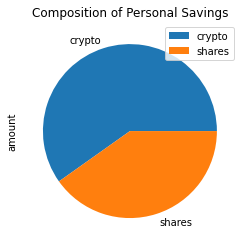

In [40]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [41]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


Part 2 - Retirement Planning
Monte Carlo Simulation

In [42]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-07-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-12', tz='America/New_York').isoformat()

In [43]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df

df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                          SPY           \
                open      high       low   close   volume    open     high   
2021-02-18  116.1400  116.2800  116.0300  116.20  3910324  389.59  391.515   
2021-02-19  116.0187  116.0600  115.7515  115.83  4416681  392.07  392.380   
2021-02-22  115.7600  115.8662  115.4800  115.49  4704520  387.06  389.620   
2021-02-23  115.7500  115.7500  115.2700  115.52  5373535  384.66  388.945   
2021-02-24  115.0600  115.5000  115.0100  115.47  6131453  386.33  392.230   

                                      
               low   close    volume  
2021-02-18  387.74  390.75  52370380  
2021-02-19  389.55  390.02  66794115  
2021-02-22  386.74  387.11  56604869  
2021-02-23  380.20  387.50  98333278  
2021-02-24  385.27  391.76  64527459

In [44]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [45]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                    \
                open      high       low   close   volume daily_return   
2021-02-18  116.1400  116.2800  116.0300  116.20  3910324          NaN   
2021-02-19  116.0187  116.0600  115.7515  115.83  4416681    -0.003184   
2021-02-22  115.7600  115.8662  115.4800  115.49  4704520    -0.002935   
2021-02-23  115.7500  115.7500  115.2700  115.52  5373535     0.000260   
2021-02-24  115.0600  115.5000  115.0100  115.47  6131453    -0.000433   

               SPY                                                  
              open     high     low   close    volume daily_return  
2021-02-18  389.59  391.515  387.74  390.75  52370380          NaN  
2021-02-19  392.07  392.380  389.55  390.02  66794115    -0.001868  
2021-02-22  387.06  389.620  386.74  387.11  56604869    -0.007461  
2021-02-23  384.66  388.945  380.20  387.50  98333278     0.001007  
2021-02-24  386.33  392.230  385.27  391.76  64527459     0.010994

In [46]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gregg\REPOs\Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999301,0.999335,1.007533,0.995385,1.004760,1.006180,0.997022,0.995197,1.004519,0.999786,...,1.000290,0.989316,1.000794,1.000692,1.003508,0.998337,0.996344,1.001180,1.007860,1.009943
2,0.991198,0.995548,1.006780,0.998381,1.006063,1.006478,0.990900,0.996653,0.995786,1.001733,...,1.003497,0.997314,1.000012,1.000683,0.995727,0.997261,1.010096,0.999794,1.012772,1.012502
3,0.990623,0.999343,1.009691,0.996869,1.012928,1.012091,0.990180,0.999849,0.996178,1.000139,...,1.001708,1.004970,0.994443,1.007025,1.009592,0.989782,1.014383,0.998579,1.016635,1.021693
4,0.986454,1.001525,0.998728,1.005709,1.005748,1.008252,0.980185,1.002029,0.997863,0.998429,...,1.008389,1.011998,0.997945,1.007372,1.008547,0.983716,1.021945,1.002106,1.016126,1.022738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,87.253012,273.056471,73.627473,345.425160,280.301122,119.006426,183.387295,127.824617,495.638288,120.892908,...,70.541020,145.791200,50.759479,133.766128,111.454124,36.878061,83.984233,123.877821,378.865655,105.732935
7557,87.400959,269.674198,73.746533,346.249645,281.740393,119.767597,185.861191,128.967174,492.978997,121.063603,...,70.631222,145.758378,51.119546,134.253688,111.951429,36.918169,83.792858,124.283944,380.612542,105.876575
7558,87.190055,270.127554,73.975108,350.334777,282.303285,119.932866,186.767490,129.273203,490.589988,121.888836,...,70.820511,145.892966,50.745709,134.129367,112.553328,37.249673,85.129426,123.929305,378.958561,106.610502
7559,87.263249,271.372476,73.959630,353.224630,281.244177,120.655591,187.560321,128.902742,489.059874,122.320196,...,71.213124,145.567062,50.709304,135.091375,112.773416,37.287903,85.177767,123.714604,380.844867,107.094888


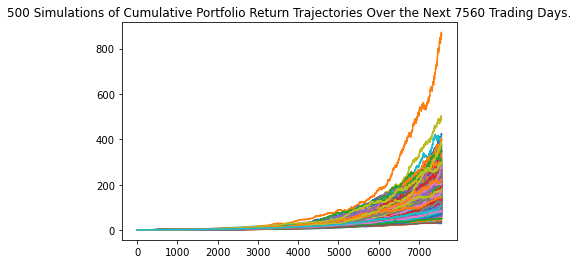

In [47]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

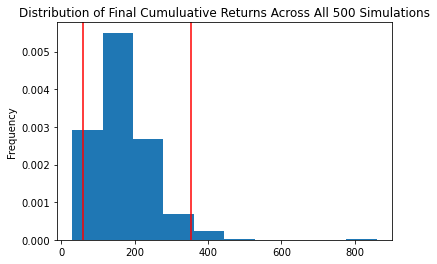

In [48]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

Retirement Analysis

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean            168.776756
std              80.502082
min              30.206719
25%             114.969079
50%             153.234539
75%             207.331796
max             859.020802
95% CI Lower     60.445900
95% CI Upper    353.240927
Name: 7560, dtype: float64


Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [50]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1208918.01 and $7064818.53


Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on 
a 50% increase in the initial investment.

In [51]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1813377.01 and $10597227.8


Optional Challenge - Early Retirement
Five Years Retirement Option

In [59]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                    \
                open      high       low   close   volume daily_return   
2021-02-18  116.1400  116.2800  116.0300  116.20  3910324          NaN   
2021-02-19  116.0187  116.0600  115.7515  115.83  4416681    -0.003184   
2021-02-22  115.7600  115.8662  115.4800  115.49  4704520    -0.002935   
2021-02-23  115.7500  115.7500  115.2700  115.52  5373535     0.000260   
2021-02-24  115.0600  115.5000  115.0100  115.47  6131453    -0.000433   

               SPY                                                  
              open     high     low   close    volume daily_return  
2021-02-18  389.59  391.515  387.74  390.75  52370380          NaN  
2021-02-19  392.07  392.380  389.55  390.02  66794115    -0.001868  
2021-02-22  387.06  389.620  386.74  387.11  56604869    -0.007461  
2021-02-23  384.66  388.945  380.20  387.50  98333278     0.001007  
2021-02-24  386.33  392.230  385.27  391.76  64527459     0.010994

In [60]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gregg\REPOs\Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005807,0.994272,1.001199,0.996484,1.000467,1.005215,0.997495,1.008953,1.008349,1.003283,...,1.002103,1.000729,1.005961,0.999224,0.996403,1.007304,0.995852,1.007028,1.003794,1.012885
2,1.000386,1.000679,0.994641,0.996579,0.996030,1.004527,0.992309,1.009737,1.005142,0.999189,...,0.999942,0.994995,1.000264,1.005096,0.991934,1.007014,0.996268,1.006302,0.995854,1.007875
3,0.989792,1.001064,0.998063,1.003743,0.997555,1.010428,0.998051,1.010075,0.999701,0.996810,...,1.004089,1.002275,0.994372,1.011219,0.989342,1.008898,0.990399,1.005645,0.994498,1.013681
4,0.991926,0.992338,0.997299,0.997736,0.992198,1.014216,0.997880,1.017647,0.999346,1.006542,...,0.998572,1.003803,0.985767,1.003363,0.985628,1.013618,0.997203,1.009406,0.991564,1.018088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.977885,2.218747,3.594507,1.926673,2.968833,2.663955,2.573069,1.700228,2.726303,2.296197,...,2.122975,3.015886,1.479390,1.812086,2.228198,1.669284,1.889502,3.008667,1.997560,2.462545
1257,1.971884,2.228445,3.606824,1.930570,2.982586,2.659074,2.566701,1.695001,2.716735,2.292314,...,2.127586,3.032130,1.478478,1.817624,2.242226,1.679771,1.906582,3.030536,1.993857,2.474173
1258,1.966403,2.227100,3.631852,1.935013,3.012958,2.665362,2.579162,1.710119,2.725195,2.299796,...,2.120354,3.029879,1.487462,1.818795,2.231621,1.688557,1.906155,3.020444,1.986494,2.468137
1259,1.966880,2.230217,3.660182,1.939337,3.004958,2.651105,2.585331,1.712460,2.720578,2.292744,...,2.121899,3.025292,1.498046,1.813850,2.252520,1.692505,1.905482,3.010910,2.005472,2.478270


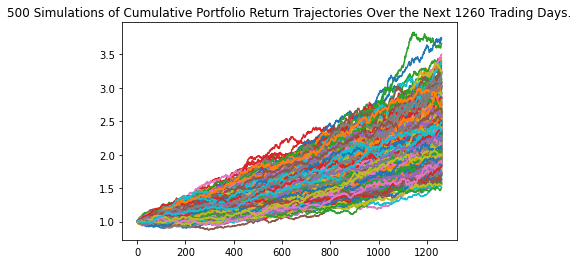

In [61]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

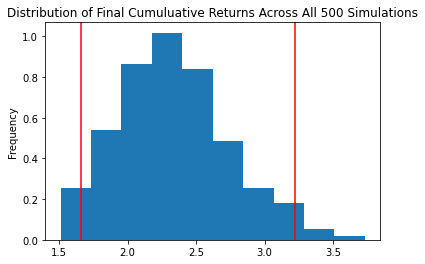

In [62]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              2.336046
std               0.402146
min               1.510141
25%               2.036501
50%               2.302123
75%               2.586196
max               3.731663
95% CI Lower      1.657340
95% CI Upper      3.222682
Name: 1260, dtype: float64


In [64]:
# Set initial investment
initial_investment_five = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*40000,2)
ci_upper_five = round(even_tbl_five[9]*40000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $66293.59 and $128907.28


Ten Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], 
num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                    \
                open      high       low   close   volume daily_return   
2021-02-18  116.1400  116.2800  116.0300  116.20  3910324          NaN   
2021-02-19  116.0187  116.0600  115.7515  115.83  4416681    -0.003184   
2021-02-22  115.7600  115.8662  115.4800  115.49  4704520    -0.002935   
2021-02-23  115.7500  115.7500  115.2700  115.52  5373535     0.000260   
2021-02-24  115.0600  115.5000  115.0100  115.47  6131453    -0.000433   

               SPY                                                  
              open     high     low   close    volume daily_return  
2021-02-18  389.59  391.515  387.74  390.75  52370380          NaN  
2021-02-19  392.07  392.380  389.55  390.02  66794115    -0.001868  
2021-02-22  387.06  389.620  386.74  387.11  56604869    -0.007461  
2021-02-23  384.66  388.945  380.20  387.50  98333278     0.001007  
2021-02-24  386.33  392.230  385.27  391.76  64527459     0.010994

In [66]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gregg\REPOs\Financial_Planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985301,1.003435,0.998513,1.013605,1.007492,1.005381,0.997517,1.001084,0.998094,0.991192,...,0.999910,0.990510,1.003409,0.992693,1.003222,1.001165,1.009426,1.010689,1.007195,0.998877
2,0.988239,1.005720,0.996283,1.012571,1.011042,1.002318,0.998948,1.001238,0.997105,0.994713,...,1.006299,0.990961,1.004152,0.992635,0.998479,1.007191,1.006372,1.011558,1.018387,0.993491
3,0.985450,1.010699,0.991647,1.013776,1.006581,1.003666,1.004433,0.999063,1.004157,0.990870,...,1.005022,0.983683,0.998655,0.984151,1.006625,1.009620,1.007267,1.007497,1.023455,0.990683
4,0.990171,1.002357,0.997906,1.012284,1.006489,1.005483,1.008796,0.996540,1.001542,0.991494,...,1.006050,0.975839,0.995982,0.986142,1.007932,1.009944,1.008067,1.006849,1.031918,0.987638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,7.530911,5.706099,6.463443,5.393153,6.721225,3.637265,5.751879,6.107439,6.346597,4.775663,...,5.713382,4.658629,5.956309,4.881545,5.258594,4.347731,5.141974,6.208531,4.972913,4.860137
2517,7.513827,5.748361,6.482275,5.398614,6.694851,3.625508,5.726959,6.100421,6.360165,4.762342,...,5.745278,4.618593,5.950514,4.871220,5.245707,4.381130,5.123603,6.257711,5.013465,4.842441
2518,7.443544,5.732669,6.532720,5.401694,6.730723,3.619461,5.700700,6.111485,6.362599,4.769265,...,5.757049,4.602697,5.935335,4.840360,5.281223,4.367515,5.129529,6.268976,5.039001,4.869318
2519,7.406624,5.791754,6.526462,5.399508,6.743043,3.589677,5.717483,6.145085,6.375488,4.779870,...,5.747445,4.593519,5.914277,4.826599,5.268408,4.374720,5.136769,6.265132,5.010425,4.901387


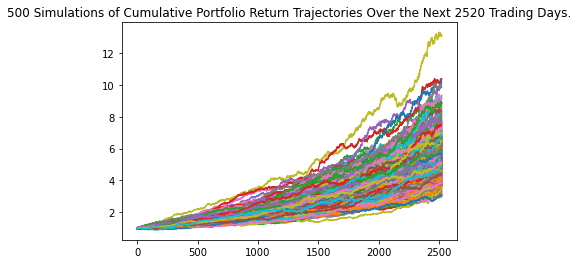

In [67]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

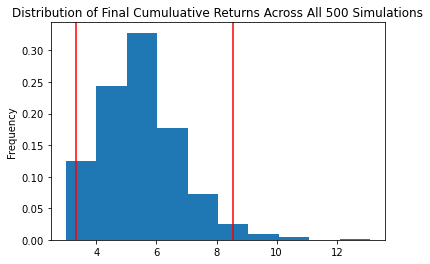

In [68]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              5.490358
std               1.336394
min               2.987268
25%               4.573580
50%               5.358121
75%               6.263747
max              13.106108
95% CI Lower      3.342411
95% CI Upper      8.551268
Name: 2520, dtype: float64


In [70]:
# Set initial investment
initial_investment_ten = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*40000,2)
ci_upper_ten = round(even_tbl_ten[9]*40000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $133696.44 and $342050.74
